# Assignment Description

Create a notebook in CoCalc called `analyzing-coin-flips-num-heads.ipynb`. Organize it according to the 9 steps and show me that you understand how to use Python to manipulate data structures such as lists, dicts, sets, standard libraries, whatever you need, and demonstrate that you can create the the exact same sort of set of assignments we did on dice rolls except on coin flips instead. You will be responsible for using a mixture of Markdown and Coding cells in order to properly structure your document like a report. Please use `n=10` and `p=.37` when thinking of your random experiment.

# Steps Summary:

 1. Create all $2^{10}$ coin flip outcomes
 2. Create a dictionary that maps from the outcomes to the heads count.
 3. Group outcomes by count and store result in a dictionary.
 4. Normalize by the probability of each outcome.
 5. Graph the probability distribution.
 6. Compute the expectation of the number of heads
 7. Generate coin flip simulations.
 8. Graph various empirical distributions exploring different numbers of outcomes generated.

# Steps

## Set Binomial Distribution Parameters

In [1]:
N, P = 4, .37

## 1. Create all $2^{10}$ coin flip outcomes

In [2]:
# without itertools, and a `for` loop, reach out unless you understand the meaning of this
outcomes = ['']
for _ in range(N):
    for idx in range(len(outcomes)):
        outcomes.append(outcomes[idx] + 't')
        outcomes[idx] += 'h'
print(outcomes)

['hhhh', 'thhh', 'hthh', 'tthh', 'hhth', 'thth', 'htth', 'ttth', 'hhht', 'thht', 'htht', 'ttht', 'hhtt', 'thtt', 'httt', 'tttt']


In [3]:
# with itertools, using the `product` function
import itertools

outcomes = tuple("".join(outcome) for outcome in itertools.product('ht', repeat=N))
print(outcomes)

('hhhh', 'hhht', 'hhth', 'hhtt', 'hthh', 'htht', 'htth', 'httt', 'thhh', 'thht', 'thth', 'thtt', 'tthh', 'ttht', 'ttth', 'tttt')


## 2. Create a dictionary that mapped from the outcomes to the heads count.

In [4]:
def get_num_heads_from_outcome(outcome):
    """Return number of heads from outcome.
    
    For example 'httthththt' has h appear 
    4 times. So this function should return
    4 for this.
    """
    num_heads = 0
    for char in outcome:
        if char == 'h':
            num_heads = num_heads + 1
    return num_heads

print(get_num_heads_from_outcome('httthththt'))

outcomes_to_num_heads = dict()
for outcome in outcomes:
    outcomes_to_num_heads[outcome] = get_num_heads_from_outcome(outcome)
print(outcomes_to_num_heads)

4
{'hhhh': 4, 'hhht': 3, 'hhth': 3, 'hhtt': 2, 'hthh': 3, 'htht': 2, 'htth': 2, 'httt': 1, 'thhh': 3, 'thht': 2, 'thth': 2, 'thtt': 1, 'tthh': 2, 'ttht': 1, 'ttth': 1, 'tttt': 0}


## 3. Group outcomes by count and store result in a dictionary.

In [5]:
num_heads_to_outcomes = {}
for outcome, num_heads in outcomes_to_num_heads.items():
    if num_heads not in num_heads_to_outcomes:
        num_heads_to_outcomes[num_heads] = []
    num_heads_to_outcomes[num_heads].append(outcome)
print(num_heads_to_outcomes)

{4: ['hhhh'], 3: ['hhht', 'hhth', 'hthh', 'thhh'], 2: ['hhtt', 'htht', 'htth', 'thht', 'thth', 'tthh'], 1: ['httt', 'thtt', 'ttht', 'ttth'], 0: ['tttt']}


## 4. Normalize by the probability of each outcome.

In [6]:
def get_probability_from_outcome(outcome, probability_of_heads=P):
    """Return probability of outcome.
    
    The probability of 'h' is P.
    The probability of 't' is 1-P.
    So the probability of getting a heads, then a heads, then a tails,
    is P * P * (1-P). 
    
    We multiply them because . . . these coin flips have nothing to do 
    with one another. They are independent events.
    """
    outcome_probability = 1
    for char in outcome:
        if char == 'h':
            outcome_probability = outcome_probability * probability_of_heads
        else:
            outcome_probability = outcome_probability * (1-probability_of_heads)
    return outcome_probability

In [7]:
num_heads_to_probability = {}
for num_head, num_head_outcomes in num_heads_to_outcomes.items():
    total_probability = 0 # we will add the probability of each outcome to this variable
    for outcome in num_head_outcomes:
        probability = get_probability_from_outcome(outcome)
        total_probability = total_probability + probability
    num_heads_to_probability[num_head] = total_probability
print(num_heads_to_probability)

{4: 0.01874161, 3: 0.12764556, 2: 0.32601366, 1: 0.37006956, 0: 0.15752961000000001}


## 5. Graph the probability distribution.

Sum probability check:  1.0


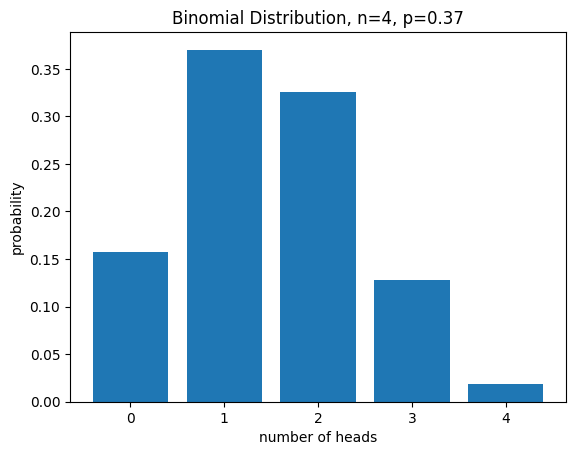

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(num_heads_to_probability.keys(), num_heads_to_probability.values())
ax.set_title(f'Binomial Distribution, n={N}, p={P}')
ax.set_xlabel('number of heads')
ax.set_xticks(range(N+1))
ax.set_ylabel('probability')
print("Sum probability check: ", sum(num_heads_to_probability.values()))

## 6. Compute the expectation of number of heads

In [9]:
expectation = 0
for num_heads, probability in num_heads_to_probability.items():
    expectation += num_heads * probability
print(f"The expected number of heads in each flip of {N} coins is {expectation:.2f}.")

The expected number of heads in each flip of 4 coins is 1.48.


## 7. Generate coin flip simulations.

In [10]:
probabilities = []
for outcome in outcomes:
    probabilities.append(get_probability_from_outcome(outcome))
print(probabilities)

[0.01874161, 0.03191139, 0.03191139, 0.05433560999999999, 0.03191139, 0.054335610000000006, 0.054335610000000006, 0.09251739, 0.03191139, 0.054335610000000006, 0.054335610000000006, 0.09251739, 0.054335610000000006, 0.09251739, 0.09251739, 0.15752961000000001]


In [11]:
import random

nums_to_generate = [10, 100, 1000, 10000, 100000, 1000000]

simulations_num_heads = {}
for num_to_generate in nums_to_generate:
    random_sample = random.choices(outcomes, weights=probabilities, k=num_to_generate)
    empirical_num_heads_values = [get_num_heads_from_outcome(outcome) for outcome in random_sample]
    simulations_num_heads[num_to_generate] = empirical_num_heads_values

## 8. Graph various empirical distributions exploring different numbers of outcomes generated.

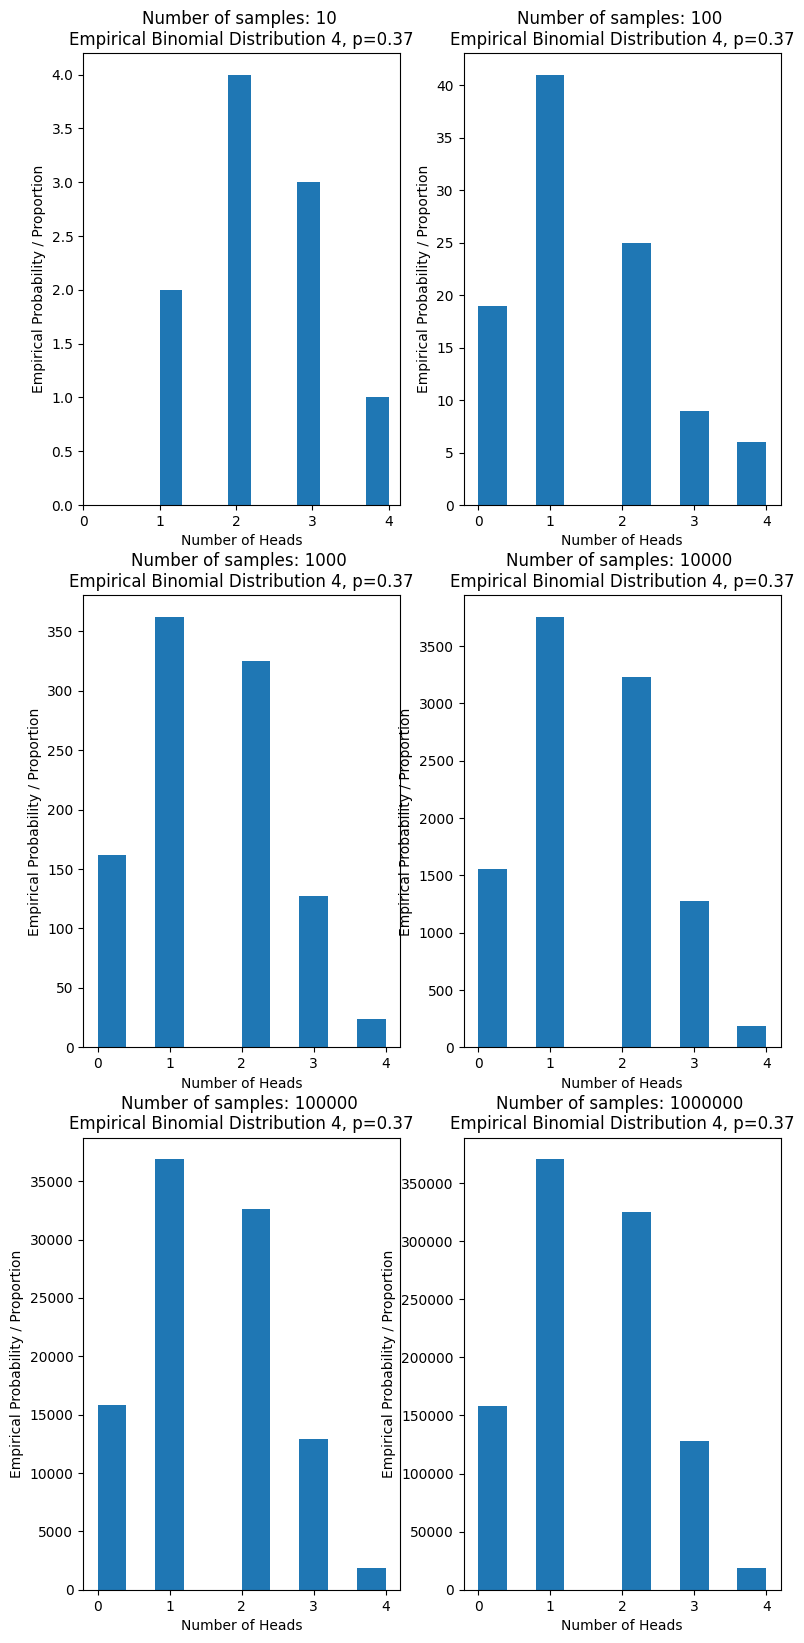

In [12]:
fig = plt.figure(figsize=(9, 27))
for idx, num_to_generate in enumerate(nums_to_generate):
    ax = fig.add_subplot(4, 2, idx + 1)
    ax.hist(simulations_num_heads[num_to_generate])
    ax.set_title(f'Number of samples: {num_to_generate} \n'
                 f'Empirical Binomial Distribution {N}, p={P}')
    ax.set_ylabel('Empirical Probability / Proportion')
    ax.set_xlabel('Number of Heads')
    ax.set_xticks(range(N+1))
plt.show()

## 9. Extra: Graph empirical probability distributions

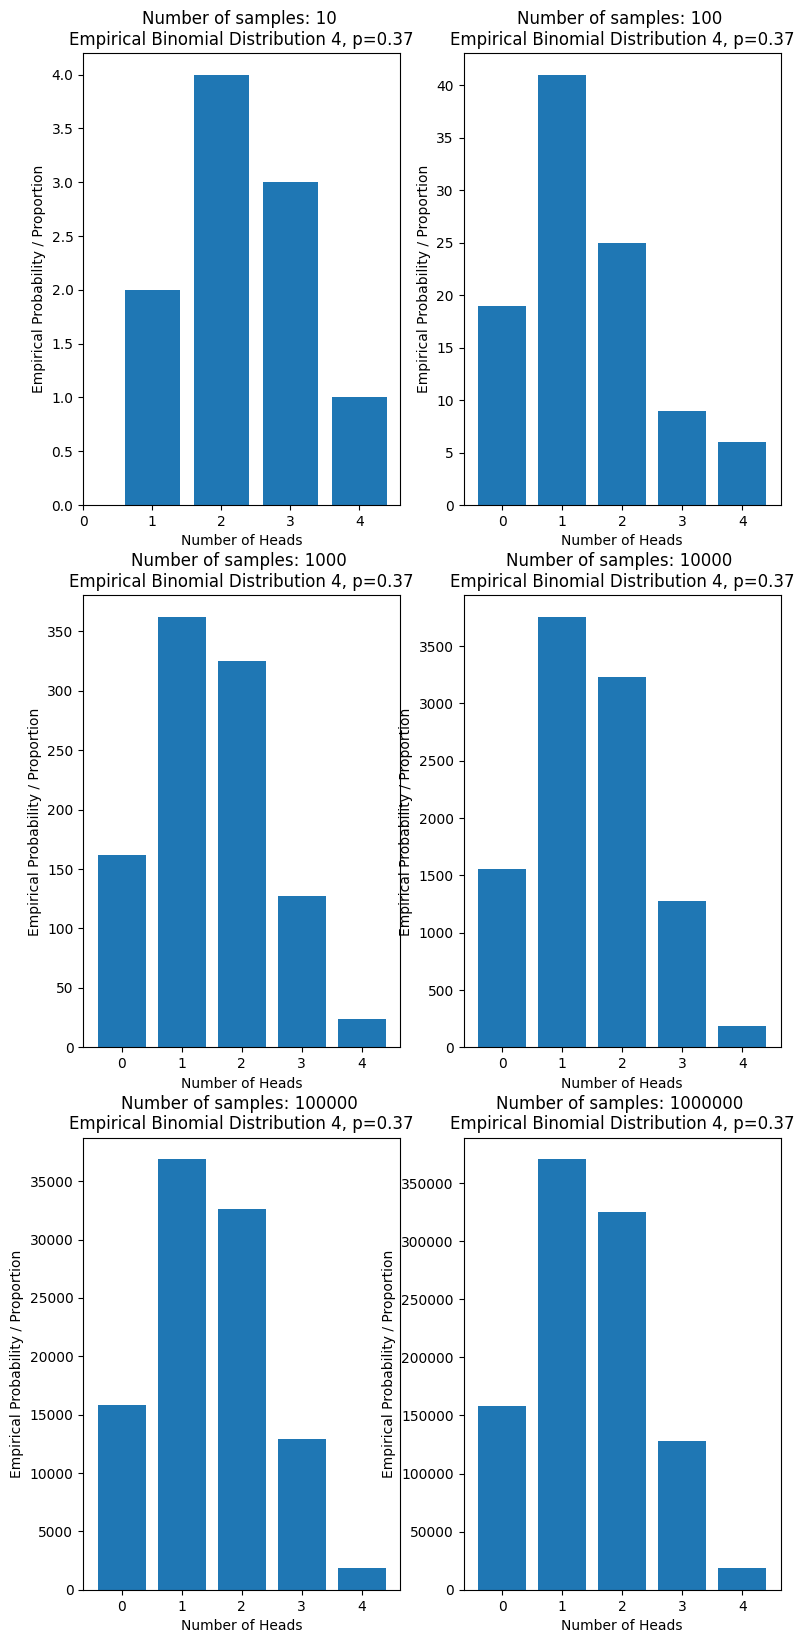

In [13]:
import collections

fig = plt.figure(figsize=(9, 27))
for idx, num_to_generate in enumerate(nums_to_generate):
    ax = fig.add_subplot(4, 2, idx + 1)
    counter = collections.Counter(simulations_num_heads[num_to_generate])
    ax.bar(counter.keys(), counter.values())
    ax.set_title(f'Number of samples: {num_to_generate} \n'
                 f'Empirical Binomial Distribution {N}, p={P}')
    ax.set_ylabel('Empirical Probability / Proportion')
    ax.set_xlabel('Number of Heads')
    ax.set_xticks(range(N+1))
plt.show()

## Additional Question: What are each of the empirical coin flips' mean number of heads? 

In other words, for 10, 100, 1000, etc. generated outcomes, find the average number of heads per group of outcomes.

In [14]:
for num in nums_to_generate:
    print(f"For {num} generated outcomes, the average number "
          f"of heads is {sum(simulations_num_heads[num])/num}.")
    
print("Remember, ", end='')
print(f"The expected number of heads in each flip of {N} coins is {expectation:.2f}.", end="\n\n")
print("Notice how the larger the number of outcomes, "
      "the closer the sample average number of heads is "
      "to the expectation of the number of heads random variable.")

For 10 generated outcomes, the average number of heads is 2.3.
For 100 generated outcomes, the average number of heads is 1.42.
For 1000 generated outcomes, the average number of heads is 1.489.
For 10000 generated outcomes, the average number of heads is 1.4777.
For 100000 generated outcomes, the average number of heads is 1.48112.
For 1000000 generated outcomes, the average number of heads is 1.478881.
Remember, The expected number of heads in each flip of 4 coins is 1.48.

Notice how the larger the number of outcomes, the closer the sample average number of heads is to the expectation of the number of heads random variable.
